In [297]:
# librareis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sqlalchemy import create_engine
import datetime

In [504]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [211002,210925, 210918]
turnstiles_df = get_data(week_nums)


In [505]:
#import to csv

turnstiles_df.to_csv('project.csv', index=False)

In [506]:
#read from sql
engine = create_engine("sqlite:///MTA.db")
df = pd.read_sql('SELECT * FROM project;', engine)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188


In [508]:
# create Date time column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME,format="%m/%d/%Y %H:%M:%S")

In [310]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,...,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,UNIQUE_STATION,WEEKDAY_INDEX,WEEKDAY,TIME_INTERVAL
210209,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,17:00:00,REGULAR,5554,...,10/01/2021,5554.0,650.0,0.0,1.0,1.0,RIT-ROOSEVELT-R,4,Friday,16:00 to 20:00
210208,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,13:00:00,REGULAR,5554,...,10/01/2021,5554.0,649.0,0.0,0.0,0.0,RIT-ROOSEVELT-R,4,Friday,12:00 to 16:00
210207,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,09:00:00,REGULAR,5554,...,10/01/2021,5554.0,649.0,0.0,0.0,0.0,RIT-ROOSEVELT-R,4,Friday,8:00 to 12:00
210204,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/30/2021,21:00:00,REGULAR,5554,...,10/01/2021,5554.0,649.0,0.0,0.0,0.0,RIT-ROOSEVELT-R,3,Thursday,20:00 to 24:00
210203,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/30/2021,17:00:00,REGULAR,5554,...,09/30/2021,5554.0,649.0,0.0,0.0,0.0,RIT-ROOSEVELT-R,3,Thursday,16:00 to 20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,20:00:00,REGULAR,7633457,...,09/12/2021,7633508.0,2612065.0,51.0,15.0,66.0,59 ST-NQR456W,5,Saturday,16:00 to 20:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,16:00:00,REGULAR,7633308,...,09/11/2021,7633457.0,2612050.0,149.0,24.0,173.0,59 ST-NQR456W,5,Saturday,12:00 to 16:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,12:00:00,REGULAR,7633203,...,09/11/2021,7633308.0,2612026.0,105.0,29.0,134.0,59 ST-NQR456W,5,Saturday,8:00 to 12:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,08:00:00,REGULAR,7633152,...,09/11/2021,7633203.0,2611997.0,51.0,44.0,95.0,59 ST-NQR456W,5,Saturday,4:00 to 8:00


In [511]:
#create new columns week day index and week day 
turnstiles_df['WEEKDAY_INDEX'] = pd.to_datetime(turnstiles_df['DATE'])
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
turnstiles_df['WEEKDAY_INDEX'] = turnstiles_df['WEEKDAY_INDEX'].dt.dayofweek
turnstiles_df['WEEKDAY'] = turnstiles_df['WEEKDAY_INDEX'].apply(lambda x: days[x])

In [512]:
#strip columns names whitespace

turnstiles_df.columns = turnstiles_df.columns.str.strip()

In [513]:
#get rid of duplicates values

turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)


In [514]:
#checking if there is a duplicates 
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-09-11 00:00:00,1
284963,R161A,R452,01-00-02,72 ST,2021-09-23 21:00:00,1
285039,R161A,R452,01-00-03,72 ST,2021-09-21 21:00:00,1
285038,R161A,R452,01-00-03,72 ST,2021-09-21 17:00:00,1
285037,R161A,R452,01-00-03,72 ST,2021-09-21 13:00:00,1


In [515]:
#shift and ceate new columns 
turnstiles_df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION"])
["DATE", "ENTRIES", "EXITS"].transform(lambda grp: grp.shift(1)))

<ipython-input-515-81d4ac6a8e2b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION"])


In [516]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY,PREV_DATE,PREV_ENTRIES,PREV_EXITS
210210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,21:00:00,REGULAR,5554,650,2021-10-01 21:00:00,4,Friday,NaN,NaN,NaN
210209,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,17:00:00,REGULAR,5554,649,2021-10-01 17:00:00,4,Friday,10/01/2021,5554.0,650.0
210208,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,13:00:00,REGULAR,5554,649,2021-10-01 13:00:00,4,Friday,10/01/2021,5554.0,649.0
210207,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,09:00:00,REGULAR,5554,649,2021-10-01 09:00:00,4,Friday,10/01/2021,5554.0,649.0
210204,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/30/2021,21:00:00,REGULAR,5554,649,2021-09-30 21:00:00,3,Thursday,10/01/2021,5554.0,649.0


In [517]:
#drop the NaN row
turnstiles_df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [518]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY,PREV_DATE,PREV_ENTRIES,PREV_EXITS
210209,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,17:00:00,REGULAR,5554,649,2021-10-01 17:00:00,4,Friday,10/01/2021,5554.0,650.0
210208,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,13:00:00,REGULAR,5554,649,2021-10-01 13:00:00,4,Friday,10/01/2021,5554.0,649.0
210207,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,09:00:00,REGULAR,5554,649,2021-10-01 09:00:00,4,Friday,10/01/2021,5554.0,649.0
210204,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/30/2021,21:00:00,REGULAR,5554,649,2021-09-30 21:00:00,3,Thursday,10/01/2021,5554.0,649.0
210203,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/30/2021,17:00:00,REGULAR,5554,649,2021-09-30 17:00:00,3,Thursday,09/30/2021,5554.0,649.0


In [519]:
#check on entries to ensure that turnstiles are not counting backwards
turnstiles_df[turnstiles_df["ENTRIES"] < turnstiles_df["PREV_ENTRIES"]].head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY,PREV_DATE,PREV_ENTRIES,PREV_EXITS
210125,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,10/01/2021,17:00:00,REGULAR,3147118,398388,2021-10-01 17:00:00,4,Friday,10/01/2021,3147168.0,398393.0
210124,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,10/01/2021,13:00:00,REGULAR,3147091,398386,2021-10-01 13:00:00,4,Friday,10/01/2021,3147118.0,398388.0
210123,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,10/01/2021,09:00:00,REGULAR,3147063,398385,2021-10-01 09:00:00,4,Friday,10/01/2021,3147091.0,398386.0
210120,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,09/30/2021,21:00:00,REGULAR,3147056,398381,2021-09-30 21:00:00,3,Thursday,10/01/2021,3147063.0,398385.0
210119,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,09/30/2021,17:00:00,REGULAR,3146999,398377,2021-09-30 17:00:00,3,Thursday,09/30/2021,3147056.0,398381.0


In [520]:
#check on exits to ensure that turnstiles are not counting backwards
turnstiles_df[turnstiles_df["EXITS"] < turnstiles_df["PREV_EXITS"]].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEKDAY_INDEX,WEEKDAY,PREV_DATE,PREV_ENTRIES,PREV_EXITS
210209,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,17:00:00,REGULAR,5554,649,2021-10-01 17:00:00,4,Friday,10/01/2021,5554.0,650.0
210184,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2021,13:00:00,REGULAR,5554,648,2021-09-27 13:00:00,0,Monday,09/27/2021,5554.0,649.0
210174,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2021,21:00:00,REGULAR,5554,647,2021-09-25 21:00:00,5,Saturday,09/26/2021,5554.0,648.0
210173,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2021,17:00:00,REGULAR,5554,646,2021-09-25 17:00:00,5,Saturday,09/25/2021,5554.0,647.0
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645,2021-09-24 13:00:00,4,Friday,09/24/2021,5554.0,646.0


In [298]:


def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter


In [315]:
#Find the difference between entries and previous entries to get the actual entries
#Get rid if any actual entry values greater than 10000 as they are outliers
#Reverse the sign/takes abs value of actual entries for turnstiles counting backwards 

def get_daily_counts_1(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
         # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"],row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter


In [319]:
#create new column that counts daily entries
turnstiles_df["DAILY_ENTRIES"] = turnstiles_df.apply(get_daily_counts, axis=1, max_counter=1000000)

In [320]:
#create new column that counts daily exits
turnstiles_df["DAILY_EXITS"]= turnstiles_df.apply(get_daily_counts_1, axis=1, max_counter=1000000)

In [321]:
turnstiles_df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,...,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,UNIQUE_STATION,WEEKDAY_INDEX,WEEKDAY,TIME_INTERVAL
49274,N029,R333,01-00-00,116 ST,BC,IND,09/11/2021,21:00:00,REGULAR,89894,...,09/12/2021,89910.0,90651.0,16.0,58.0,74.0,116 ST-BC,5,Saturday,20:00 to 24:00
21936,C012,R258,01-00-01,4AV-9 ST,DFGMNR,BMT,09/29/2021,00:00:00,REGULAR,1448515,...,09/29/2021,1448518.0,468366.0,3.0,1.0,4.0,4AV-9 ST-DFGMNR,2,Wednesday,0:00 to 4:00
169400,R254,R181,01-00-02,110 ST,6,IRT,09/22/2021,20:00:00,REGULAR,14828736,...,09/23/2021,14828782.0,5018272.0,46.0,53.0,99.0,110 ST-6,2,Wednesday,16:00 to 20:00
144979,R161B,R452,00-03-00,72 ST,123,IRT,09/20/2021,21:00:00,REGULAR,782540,...,09/21/2021,782641.0,1674236.0,101.0,174.0,275.0,72 ST-123,0,Monday,20:00 to 24:00
139687,R139,R031,04-06-00,34 ST-PENN STA,123,IRT,09/16/2021,08:00:00,REGULAR,9470,...,09/16/2021,9473.0,75365.0,3.0,32.0,35.0,34 ST-PENN STA-123,3,Thursday,4:00 to 8:00


In [322]:
#create new column that counts TRAFFIC for each station
turnstiles_df['TRAFFIC'] = turnstiles_df['DAILY_ENTRIES'] + turnstiles_df['DAILY_EXITS']
turnstiles_df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,...,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,UNIQUE_STATION,WEEKDAY_INDEX,WEEKDAY,TIME_INTERVAL
34998,H014,R249,00-00-01,GRAHAM AV,L,BMT,09/27/2021,12:00:00,REGULAR,433845,...,09/27/2021,433881.0,1442844.0,36.0,124.0,160.0,GRAHAM AV-L,0,Monday,8:00 to 12:00
142668,R155,R116,01-00-08,50 ST,1,IRT,09/27/2021,00:00:00,REGULAR,1994193,...,09/27/2021,1994206.0,3755029.0,13.0,21.0,34.0,50 ST-1,0,Monday,0:00 to 4:00
28232,D015,R396,00-03-01,AVENUE U,N,BMT,09/18/2021,13:00:00,REGULAR,317108,...,09/18/2021,317156.0,257901.0,48.0,55.0,103.0,AVENUE U-N,5,Saturday,12:00 to 16:00
22688,C016,R278,00-00-01,25 ST,R,BMT,09/26/2021,16:00:00,REGULAR,1656836,...,09/26/2021,1656878.0,483401.0,42.0,13.0,55.0,25 ST-R,6,Sunday,12:00 to 16:00
158228,R227A,R131,01-00-00,23 ST,6,IRT,09/19/2021,17:00:00,REGULAR,734770,...,09/19/2021,734847.0,406559.0,77.0,90.0,167.0,23 ST-6,6,Sunday,16:00 to 20:00


In [323]:
#create new column UNIQUE_STATION since there is more than one station with the same name
turnstiles_df['UNIQUE_STATION'] = turnstiles_df['STATION'] + '-' + turnstiles_df['LINENAME']


In [324]:
#create new df top5_stations to find top 5 traffic stations
top5_stations = turnstiles_df.groupby('UNIQUE_STATION').sum()\
    .sort_values('TRAFFIC', ascending=False)\
    .reset_index()

station_fig= station_totals[0:5]
station_fig

,UNIQUE_STATION,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,WEEKDAY_INDEX
0,JUNCTION BLVD-7,5765798978,7022033199,5.765990e+09,7.022299e+09,4757208.0,227528.0,4984736.0,3306
1,GRD CNTRL-42 ST-4567S,206485684662,171994030684,2.064862e+11,1.719948e+11,803733.0,886569.0,1690302.0,25599
2,34 ST-HERALD SQ-BDFMNQRW,329231269787,404398715815,3.292319e+11,4.043997e+11,719064.0,963551.0,1682615.0,16758
3,72 ST-123,63546135300,149799772146,6.354538e+10,1.497997e+11,1266704.0,352418.0,1619122.0,5440
4,ST. GEORGE-1,128703997183,111079362979,1.287041e+11,1.110794e+11,1534957.0,1473.0,1536430.0,7440


<Figure size 8000x4000 with 0 Axes>

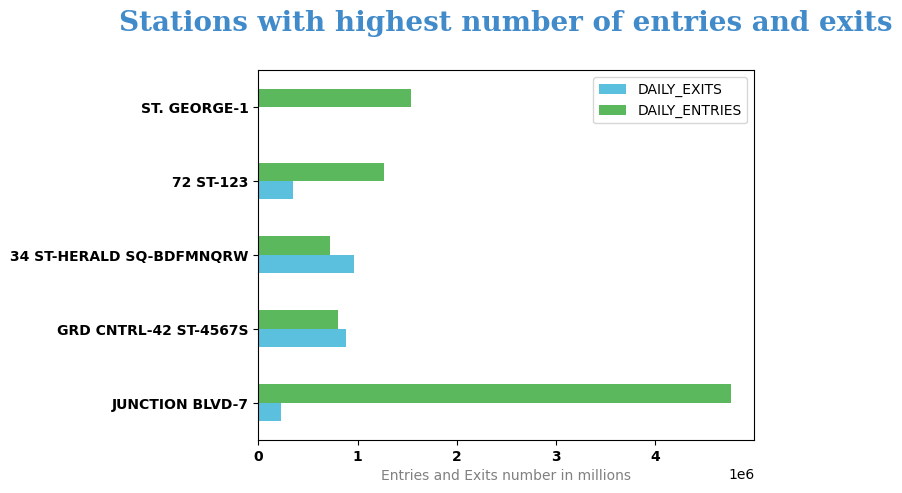

In [325]:
#ploating Stations with highest number of entries and exits


plt.figure(figsize=(20,10),dpi=400)
station_fig.plot(x = 'UNIQUE_STATION', y = ['DAILY_EXITS','DAILY_ENTRIES'], color = ['#5bc0de', '#5cb85c'], kind = 'barh')
plt.title('Stations with highest number of entries and exits\n',family='serif',fontsize = 20,loc='center',weight = 'bold',color='#428bca');
plt.xlabel('Entries and Exits number in millions',fontsize = 10,color='gray')
plt.ylabel(None)
plt.xticks(rotation=0,weight="bold",fontsize = 10)
plt.yticks(weight="bold")
plt.savefig('highest number of entries and exits.png',dpi=400)

<Figure size 6000x1600 with 0 Axes>

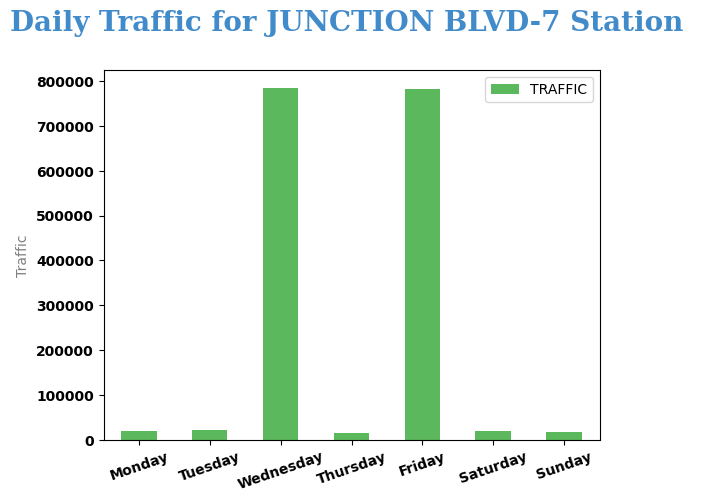

<Figure size 6000x1600 with 0 Axes>

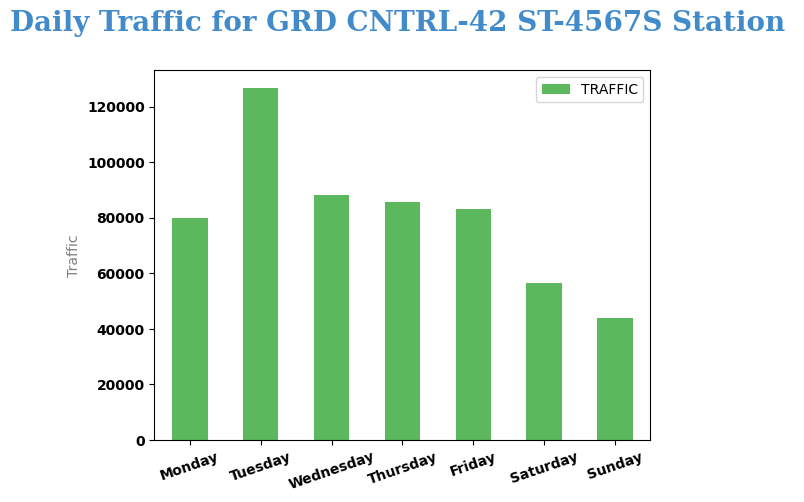

<Figure size 6000x1600 with 0 Axes>

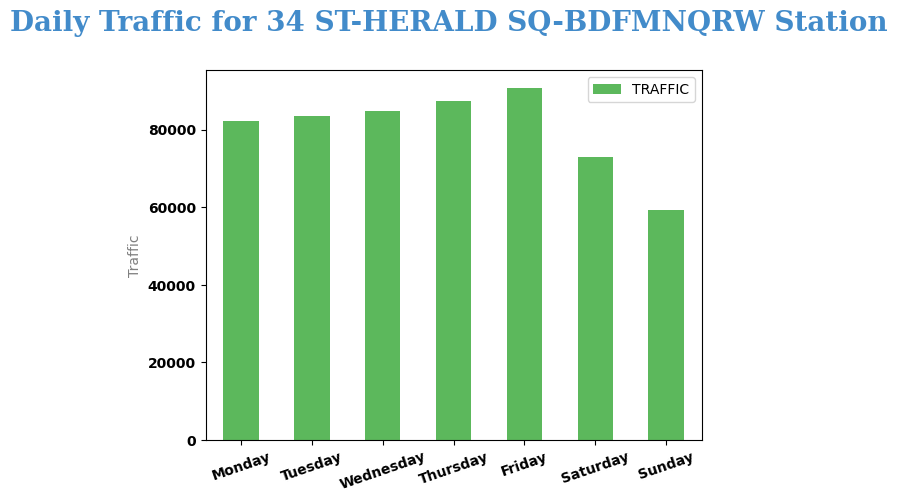

<Figure size 6000x1600 with 0 Axes>

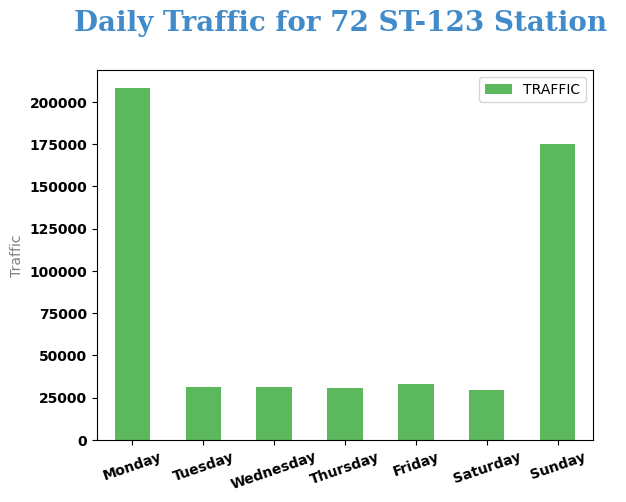

<Figure size 6000x1600 with 0 Axes>

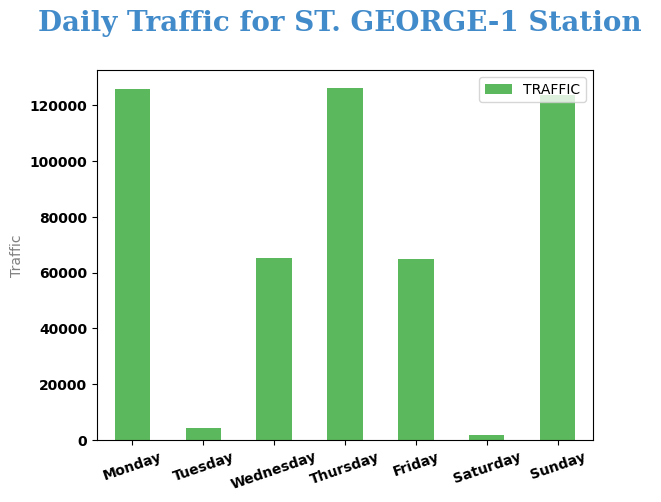

In [307]:
# ploting Daily Traffic for top5 traffic Station
list_top5 = ["JUNCTION BLVD-7","GRD CNTRL-42 ST-4567S","34 ST-HERALD SQ-BDFMNQRW","72 ST-123","ST. GEORGE-1"]
for i in range(len(list_top5)):
    
    mask = (turnstiles_df["UNIQUE_STATION"]==list_top5[i])
    weekday_df = turnstiles_df[mask].groupby(['UNIQUE_STATION','WEEKDAY', 'WEEKDAY_INDEX', 'DATE'])['TRAFFIC'].sum()\
        .reset_index()\
        .sort_values('TRAFFIC', ascending = False)
    weekday_df1 = weekday_df.groupby(['WEEKDAY', 'WEEKDAY_INDEX'], as_index=False)['TRAFFIC'].mean()
    weekday_df1 = weekday_df1.sort_values(by = 'WEEKDAY_INDEX', ascending = 1)

    plt.figure(figsize=(15,4),dpi=400)
    weekday_df1.plot(x = 'WEEKDAY', y = 'TRAFFIC', color = '#5cb85c', kind = 'bar')
    plt.title(f'Daily Traffic for {list_top5[i]} Station \n',family='serif',fontsize = 20,loc='center',weight = 'bold',color='#428bca');
    plt.ylabel('Traffic',fontsize = 10,color='gray')
    plt.xlabel(None)
    plt.xticks(rotation=19,weight="bold",fontsize = 10)
    plt.yticks(weight="bold")
    plt.savefig(f'Daily Traffic for {list_top5[i]} Station.png',dpi=400)



In [195]:
#creating time intervals column
turnstiles_df["TIME_INTERVAL"] = (
    np.where( (turnstiles_df.DATE_TIME.dt.hour <= 4), "0:00 to 4:00"
         ,np.where(
             (turnstiles_df.DATE_TIME.dt.hour <= 8), "4:00 to 8:00"
             ,np.where(
                 (turnstiles_df.DATE_TIME.dt.hour <= 12), "8:00 to 12:00"
                 ,np.where(
                     (turnstiles_df.DATE_TIME.dt.hour <= 16), "12:00 to 16:00"
                     ,np.where(
                         (turnstiles_df.DATE_TIME.dt.hour <= 20), "16:00 to 20:00"
                         ,"20:00 to 24:00"))))))

In [212]:
TIME_INTERVAL_df = turnstiles_df[turnstiles_df['UNIQUE_STATION'].isin(list_top5)]

In [213]:
TIME_INTERVAL_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,...,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,UNIQUE_STATION,WEEKDAY_INDEX,WEEKDAY,TIME_INTERVAL
209495,S101A,R070,01-05-01,ST. GEORGE,1,SRT,10/01/2021,16:00:00,REGULAR,803,...,10/01/2021,803.0,0.0,0.0,0.0,0.0,ST. GEORGE-1,4,Friday,12:00 to 16:00
209494,S101A,R070,01-05-01,ST. GEORGE,1,SRT,10/01/2021,12:00:00,REGULAR,803,...,10/01/2021,803.0,0.0,0.0,0.0,0.0,ST. GEORGE-1,4,Friday,8:00 to 12:00
209493,S101A,R070,01-05-01,ST. GEORGE,1,SRT,10/01/2021,08:00:00,REGULAR,803,...,10/01/2021,803.0,0.0,0.0,0.0,0.0,ST. GEORGE-1,4,Friday,4:00 to 8:00
209491,S101A,R070,01-05-01,ST. GEORGE,1,SRT,10/01/2021,00:00:00,REGULAR,803,...,10/01/2021,803.0,0.0,0.0,0.0,0.0,ST. GEORGE-1,4,Friday,0:00 to 4:00
209490,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/30/2021,20:00:00,REGULAR,803,...,10/01/2021,803.0,0.0,0.0,0.0,0.0,ST. GEORGE-1,3,Thursday,16:00 to 20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,09/11/2021,20:00:00,REGULAR,28999421,...,09/12/2021,28999686.0,12371090.0,265.0,236.0,501.0,34 ST-HERALD SQ-BDFMNQRW,5,Saturday,16:00 to 20:00
3320,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,09/11/2021,16:00:00,REGULAR,28998997,...,09/11/2021,28999421.0,12370854.0,424.0,382.0,806.0,34 ST-HERALD SQ-BDFMNQRW,5,Saturday,12:00 to 16:00
3319,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,09/11/2021,12:00:00,REGULAR,28998659,...,09/11/2021,28998997.0,12370472.0,338.0,375.0,713.0,34 ST-HERALD SQ-BDFMNQRW,5,Saturday,8:00 to 12:00
3318,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,09/11/2021,08:00:00,REGULAR,28998511,...,09/11/2021,28998659.0,12370097.0,148.0,201.0,349.0,34 ST-HERALD SQ-BDFMNQRW,5,Saturday,4:00 to 8:00


In [291]:
#new df with each station time intervals traffic

time_df = TIME_INTERVAL_df.groupby(['UNIQUE_STATION','TIME_INTERVAL']).sum()\
    .sort_values('TIME_INTERVAL', ascending=False)\
    .reset_index()


time_df 

,UNIQUE_STATION,TIME_INTERVAL,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,WEEKDAY_INDEX
0,ST. GEORGE-1,8:00 to 12:00,26236899214,22647245608,2.623691e+10,2.264725e+10,15707.0,1.0,15708.0,1512
1,34 ST-HERALD SQ-BDFMNQRW,8:00 to 12:00,66695985118,81866034868,6.669615e+10,8.186629e+10,184036.0,253844.0,437880.0,3402
2,JUNCTION BLVD-7,8:00 to 12:00,1146999618,1399579400,1.147046e+09,1.399629e+09,46412.0,49742.0,96154.0,648
3,GRD CNTRL-42 ST-4567S,8:00 to 12:00,44972266401,39111131493,4.497229e+10,3.911126e+10,265573.0,265659.0,531232.0,5878
4,72 ST-123,8:00 to 12:00,16078508971,37901287076,1.607759e+10,3.790106e+10,1022156.0,94646.0,1116802.0,1383
5,GRD CNTRL-42 ST-4567S,4:00 to 8:00,28747016535,17414242753,2.874710e+10,1.741441e+10,88994.0,166668.0,255662.0,2331
6,ST. GEORGE-1,4:00 to 8:00,26236700359,22647245424,2.623690e+10,2.264725e+10,564632.0,552.0,565184.0,1512
7,34 ST-HERALD SQ-BDFMNQRW,4:00 to 8:00,66695875637,81865743367,6.669598e+10,8.186603e+10,116460.0,284103.0,400563.0,3402
8,JUNCTION BLVD-7,4:00 to 8:00,1220955398,1485322136,1.221050e+09,1.485391e+09,4660099.0,30529.0,4690628.0,696
9,GRD CNTRL-42 ST-4567S,20:00 to 24:00,15452698918,20663704206,1.545273e+10,2.066373e+10,26645.0,29076.0,55721.0,3363


<Figure size 6000x1600 with 0 Axes>

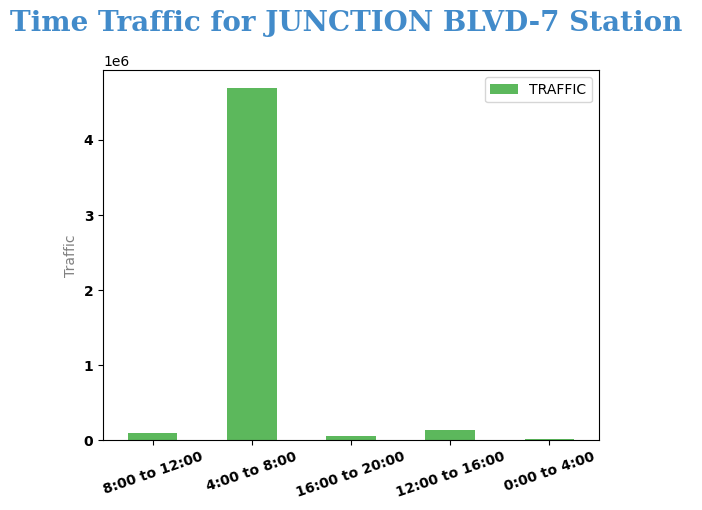

<Figure size 6000x1600 with 0 Axes>

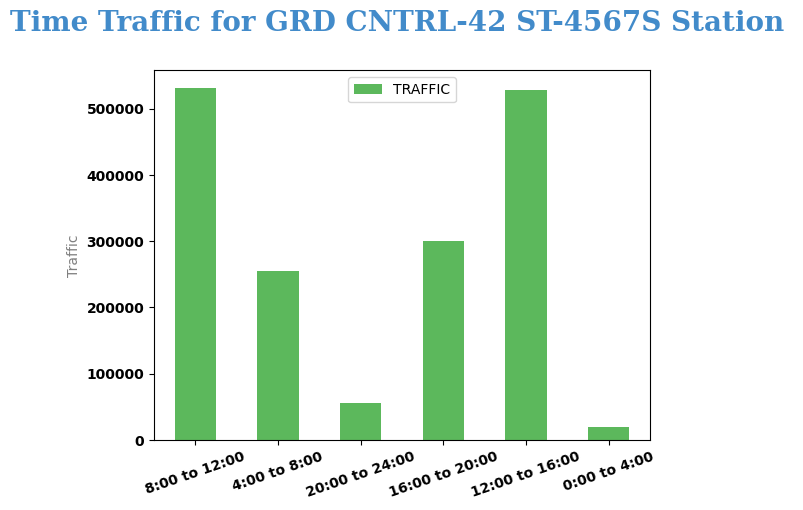

<Figure size 6000x1600 with 0 Axes>

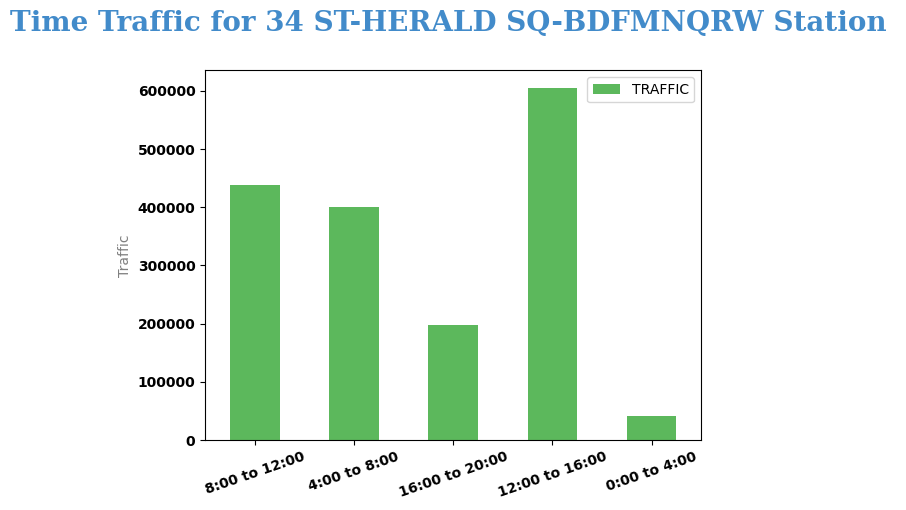

<Figure size 6000x1600 with 0 Axes>

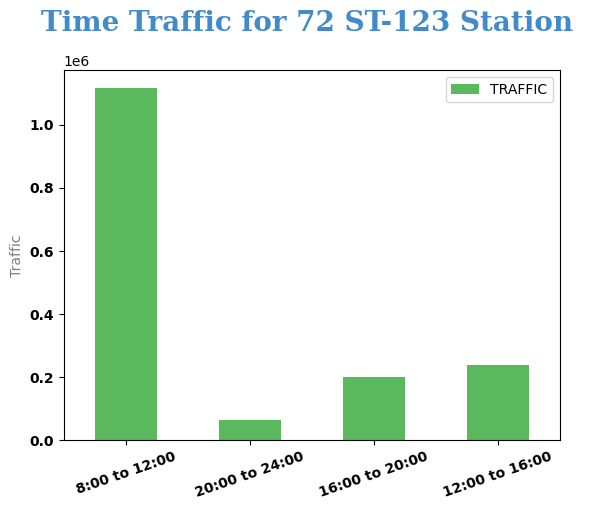

<Figure size 6000x1600 with 0 Axes>

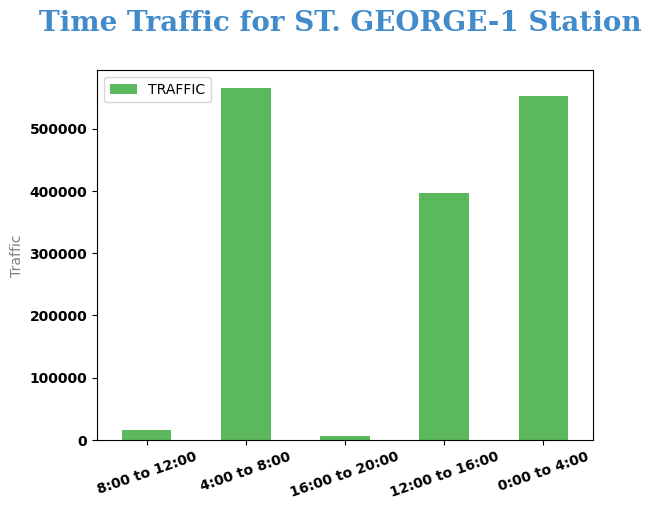

In [328]:
# ploting Time Traffic for top5 traffic Station

for i in range(len(list_top5)):
    mask = time_df[
           (time_df['UNIQUE_STATION']==list_top5[i])]
    plt.figure(figsize=(15,4),dpi=400)
    mask.plot(x = 'TIME_INTERVAL', y = 'TRAFFIC', color = '#5cb85c', kind = 'bar')
    plt.title(f'Time Traffic for {list_top5[i]} Station \n',family='serif',fontsize = 20,loc='center',weight = 'bold',color='#428bca');
    plt.ylabel('Traffic',fontsize = 10,color='gray')
    plt.xlabel(None)
    plt.xticks(rotation=19,weight="bold",fontsize = 10)
    plt.yticks(weight="bold")
    plt.savefig(f'Time Traffic for {list_top5[i]} Station.png',dpi=400)
    
    